# Importing Libraries

In [357]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

# Read the Data as Dataframe

In [358]:
# Reading Data
df_online_retail = pd.read_csv('../00_Data/data.csv', encoding= 'unicode_escape', na_values='nan')

# Initial Check of Data:
Check of shape, data types, missing values and initial statics of the columns

In [359]:
# Check shape of data 
print(df_online_retail.shape)
print("The dataframe consists of", df_online_retail.shape[1], "columns and of", df_online_retail.shape[0], "rows")

(541909, 8)
The dataframe consists of 8 columns and of 541909 rows


In [360]:
# Check first five rows of Data
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [361]:
# Check Data Types
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [362]:
# Check number of missing values per column
missing_count = pd.DataFrame(df_online_retail.isnull().sum().sort_values(ascending=False), columns=['No. NA'])
missing_perc = pd.DataFrame(round(df_online_retail.isnull().sum().sort_values(ascending=False)/len(df_online_retail)*100,2), columns=['%NA']) 
missing_values = pd.concat([missing_count, missing_perc], axis=1)
missing_values

,No. NA,%NA
CustomerID,135080,24.93
Description,1454,0.27
InvoiceNo,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00


# Analysis of Missing Data

In [363]:
# Customer ID Null 
customer_nan = df_online_retail[df_online_retail['CustomerID'].isnull()]
customer_nan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [364]:
# Further missing values
customer_nan.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

All missing values in "Description" correspond to missing values in "Customer ID". Dropping NA in "Customer ID" will also clean out missing data in "Description". 

In [365]:
customer_nan.Description.unique()

array([nan, 'DECORATIVE ROSE BATHROOM BOTTLE',
       'DECORATIVE CATS BATHROOM BOTTLE', ...,
       'LANDMARK FRAME COVENT GARDEN ', 'BLUE DISCO HANDBAG',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

In [366]:
print(customer_nan.groupby(by='Description').size().sort_values(ascending=False))

Description
DOTCOM POSTAGE                         693
JUMBO BAG RED RETROSPOT                497
JUMBO STORAGE BAG SUKI                 414
JUMBO SHOPPER VINTAGE RED PAISLEY      388
JUMBO BAG WOODLAND ANIMALS             372
                                      ... 
LANDMARK FRAME COVENT GARDEN             1
LARGE APOTHECARY MEASURING JAR           1
LARGE BONNE JAM JAR  T-LIGHT HOLDER      1
LARGE HEART FLOWERS HOOK                 1
wrongly sold sets                        1
Length: 3554, dtype: int64


**Potential Changes for Data**
- Drop all Missing Values
- Analyse Entries with Negative Quantity
- Change Datetime Type & CustomerID to String
- Use Label Encoder for StockCode & CustomerID

# Data Cleaning & Transformation

## Missing Data

In [367]:
# Data Type Transformations

# Convert Invoice Date into Date time
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'])

# Sanity Check
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [368]:
# Drop NA for customer and check remaining NA
df_online_retail = df_online_retail[df_online_retail['CustomerID'].notna()]
df_online_retail.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [369]:
# Check Impact of Data Cleaning on Shape
initial_number_rows = 541909
print("Shape of transformed Dataframe:", df_online_retail.shape)
print(initial_number_rows - df_online_retail.shape[0], "rows were removed from the Dataframe during data cleaning.")


Shape of transformed Dataframe: (406829, 8)
135080 rows were removed from the Dataframe during data cleaning.


## Item & Label Encoding

In [370]:
# User & Item  Label Encoder 

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Convert CustomerID to String
df_online_retail['CustomerID'] = df_online_retail['CustomerID'].astype(str)

# Set up Objects for User and Item Column
le1 = LabelEncoder()
le2 = LabelEncoder()

# Fit the encoders to the columns in question
le1.fit(df_online_retail['StockCode'])
le2.fit(df_online_retail['CustomerID'])

# Transform dataframe with encoded labels
df_online_retail['StockCode'] = le1.transform(df_online_retail['StockCode']).astype(str)
df_online_retail['CustomerID'] = le2.transform(df_online_retail['CustomerID']).astype(str)

# Check Change 
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,4048,United Kingdom
1,536365,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,4048,United Kingdom
2,536365,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,4048,United Kingdom
3,536365,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,4048,United Kingdom
4,536365,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,4048,United Kingdom


## Users & Items with less than 10 Interactions

In [371]:
# Initial Values
initial_items_unique=df_online_retail.StockCode.nunique()
initial_users_unique=df_online_retail.CustomerID.nunique()

In [372]:
print("initial unique items:", initial_items_unique)
print("initial unique users:", initial_users_unique)

initial unique items: 3684
initial unique users: 4372


In [380]:
# New df with counts of unique items per User 
users_itemcounts = df_online_retail.groupby('CustomerID')['StockCode'].nunique()

# Filter out users with less than 10 unique items 
users_ten_items = users_itemcounts[users_itemcounts>=10].index

# New df with counts of unique users per Item
item_usercounts = df_online_retail.groupby('StockCode')['CustomerID'].nunique()

# Filter out items with less than 10 unique users
items_ten_users = item_usercounts[item_usercounts>10].index

# Filter dataframe 
df_online_retail = df_online_retail[
    df_online_retail['CustomerID'].isin(users_ten_items) &
    df_online_retail['StockCode'].isin(items_ten_users)
] 


In [381]:
# Unique Users and Items
df_online_retail.nunique()

InvoiceNo      20866
StockCode       2745
Description     2960
Quantity         388
InvoiceDate    19351
UnitPrice        543
CustomerID      3699
Country           36
dtype: int64

In [288]:
print("Excluded Items:", initial_items_unique - df_online_retail.StockCode.nunique())
print("Excluded Users:", initial_users_unique - df_online_retail.CustomerID.nunique())

Excluded Items: 939
Excluded Users: 673


## Strange Descriptions

In [399]:
df_negative_quantity = df_online_retail[df_online_retail['Quantity']<0]
df_negative_quantity['Description'].value_counts()

REGENCY CAKESTAND 3 TIER        178
Manual                          152
POSTAGE                          92
JAM MAKING SET WITH JARS         86
Discount                         74
                               ... 
HERB MARKER PARSLEY               1
HERB MARKER THYME                 1
HERB MARKER MINT                  1
HERB MARKER ROSEMARY              1
HOUSE SHAPE PENCIL SHARPENER      1
Name: Description, Length: 1769, dtype: int64

In [425]:
test= df_online_retail['Description'].str.contains('^(?:(?=.*[a-z])[A-Za-z]+)(?:\s|$)')
df_online_retail[test]['Description'].unique()

array(['Discount', 'BAG 500g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 45x30cm',
       'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No',
       'Manual', 'BAG 250g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES',
       'NUMBER TILE COTTAGE GARDEN No',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 30CMx30CM', 'Next Day Carriage'],
      dtype=object)

In [438]:
# Filter out Discount & Next Day Carriage
df_online_retail = df_online_retail[df_online_retail['Description']!='Discount']
df_online_retail = df_online_retail[df_online_retail['Description']!='Next Day Carriage']

# Descriptive Data Analysis

In [439]:
# Descriptive Statistics Numerical  
df_online_retail.describe()

,Quantity,UnitPrice
count,397656.00,397656.00
mean,11.66,3.23
std,39.57,30.86
min,-9360.00,0.00
25%,2.00,1.25
50%,5.00,1.95
75%,12.00,3.75
max,4800.00,8142.75


In [440]:
# Descriptive Statistics Categorical
df_online_retail.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,397656,397656,397656,397656,397656
unique,20804,2743,2958,3699,36
top,576339,3249,WHITE HANGING HEART T-LIGHT HOLDER,4042,United Kingdom
freq,530,2032,2025,7888,353358


In [480]:
# Sparcity in %
# User x item Matrix  
matrix = pd.pivot_table(df_online_retail, values='Quantity', index='CustomerID', columns='StockCode')

# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_interactions = df_online_retail.groupby(['StockCode', 'CustomerID']).agg({'CustomerID': 'count'})

# Rename the columns
df_interactions.columns = ['NumberOrders']

# Reset the index
df_interactions.reset_index(inplace=True)

# Sparcity in %
print("Sparcity:", 100-((df_interactions.shape[0] / (matrix.shape[0]*matrix.shape[1]))*100))
print("Unique Transactions:", df_interactions.shape[0])
print("Potential Transactions:", matrix.shape[0]*matrix.shape[1])
print("Overall Transactions:", df_online_retail.shape[0])

Sparcity: 97.43677459801582
Unique Transactions: 260074
Potential Transactions: 10146357
Overall Transactions: 397656


In [299]:
260152 / 10153755

0.02562126031207174

In [442]:
397656 - 260074

137582

## Categorical Values

### InvoiceNo & Transaction Dates

In [152]:
print('Number of unique orders', df_online_retail.InvoiceNo.nunique()) 

22190

In [193]:
# Create DataFrame
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_orders = df_online_retail.groupby('InvoiceNo').agg({'InvoiceNo': 'count', 'Quantity': 'sum', 'UnitPrice': 'sum'})

# Rename the columns
df_orders.columns = ['NoItems', 'TotalQuantity', 'TotalUnitPrice']

# Calculate the product of Quantity and UnitPrice
df_orders['Amount'] = df_orders['TotalQuantity'] * df_orders['TotalUnitPrice']

# Reset the index
df_orders.reset_index(inplace=True)

# Rename the dataframe to df_orders
df_orders = df_orders[['InvoiceNo', 'NoItems', 'Amount']]

# Print the new dataframe
df_orders.head()

,InvoiceNo,NoItems,Amount
0,536365,7,1094.80
1,536366,2,44.40
2,536367,12,4833.92
3,536368,4,286.50
4,536369,1,17.85


In [205]:
# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df_orders.describe()

,NoItems,Amount
count,22190.00,22190.00
mean,18.33,21361.53
std,23.89,147654.44
min,1.00,-267618.04
25%,3.00,305.28
50%,12.00,4316.18
75%,24.00,14115.57
max,542.00,8731517.22


/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_83121/2448532773.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


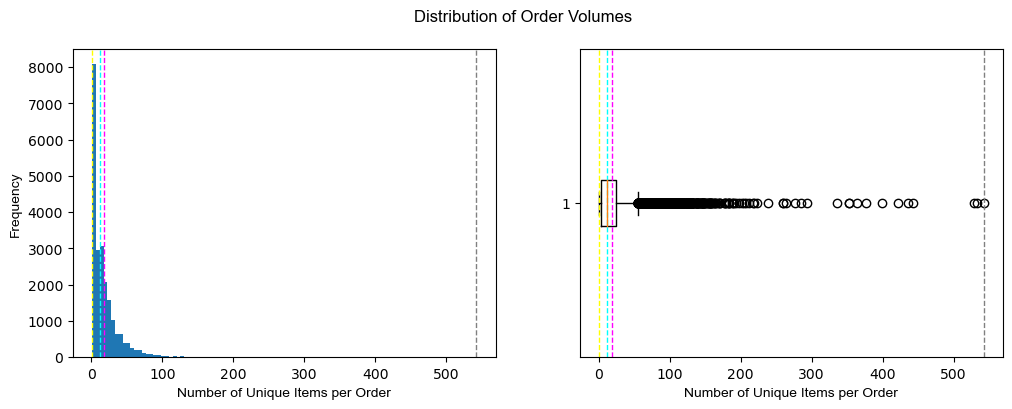

In [217]:
# Visualization of Order Volumes 
# Histogram & Boxplot

# Define feature column
feature = df_orders['NoItems']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (12,4))


# Plot the histogram   
ax[0].hist(feature, bins=100)
ax[0].set_ylabel('Frequency', fontname='Arial')
ax[0].set_xlabel('Number of Unique Items per Order', fontname='Arial')
ax[0].ticklabel_format(useOffset=False, style='plain')

# Add lines for the mean, median, mode, min and max
ax[0].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[0].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Plot the boxplot   
ax[1].boxplot(feature, vert=False)
ax[1].set_xlabel('Number of Unique Items per Order', fontname='Arial')
ax[1].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[1].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Add a title to the Figure
fig.suptitle('Distribution of Order Volumes',fontname='Arial')

# Show the figure
fig.show()

### Number of Items per User

In [225]:
# Create DataFrmmae
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_users = df_online_retail.groupby('CustomerID').agg({'CustomerID': 'count'})

# Rename the columns
df_users.columns = ['NumberItems']

# Reset the index
df_users.reset_index(inplace=True)

df_users.head()


,CustomerID,NumberItems
0,0,2
1,1,182
2,10,131
3,100,531
4,1000,8


In [231]:
len(df_users[df_users['NumberItems']>=10])

3781

In [232]:
len(df_users)

4372

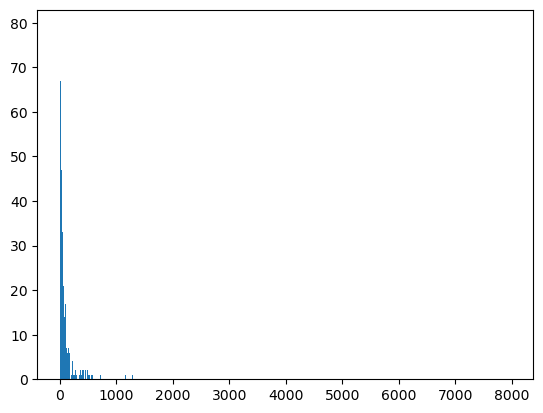

In [233]:
plt.hist(df_users.NumberItems, bins=8000)
plt.show()

### Number of Orders per Item

In [460]:
# Create DataFrmmae
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_items = df_online_retail.groupby('StockCode').agg({'StockCode': 'count'})

# Rename the columns
df_items.columns = ['NumberOrders']

# Reset the index
df_items.reset_index(inplace=True)

df_items.head()


,StockCode,NumberOrders
0,0,49
1,1,21
2,100,47
3,1000,153
4,1001,156


In [461]:
df_items.describe()

,NumberOrders
count,2743.00
mean,144.97
std,178.32
min,11.00
25%,38.00
50%,85.00
75%,179.00
max,2032.00


/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_83121/524173217.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


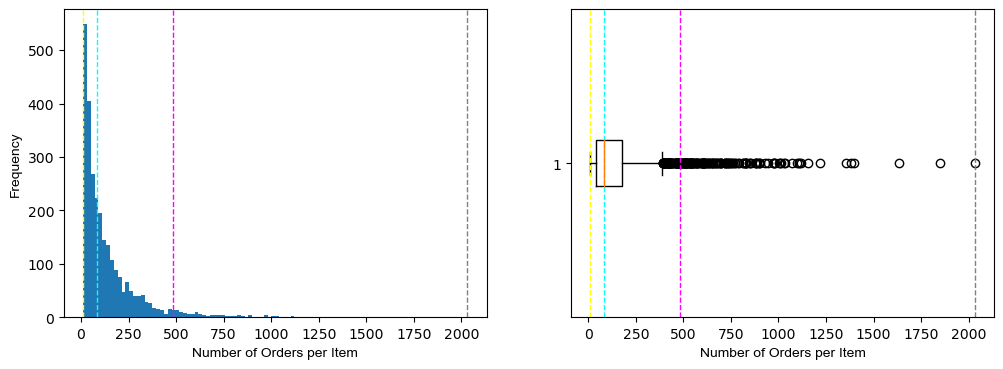

In [468]:
# Visualization of Item Purchase Frequency 
# Histogram & Boxplot

# Define feature column
feature = df_items['NumberOrders']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (12,4))


# Plot the histogram   
ax[0].hist(feature, bins=100)
ax[0].set_ylabel('Frequency', fontname='Arial')
ax[0].set_xlabel('Number of Orders per Item', fontname='Arial')
ax[0].ticklabel_format(useOffset=False, style='plain')

# Add lines for the mean, median, mode, min and max
ax[0].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[0].axvline(feature.quantile(0.95), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Plot the boxplot   
ax[1].boxplot(feature, vert=False)
ax[1].set_xlabel('Number of Orders per Item', fontname='Arial')
ax[1].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[1].axvline(feature.quantile(0.95), color='magenta', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Add a title to the Figure
#fig.suptitle('Popular Items',fontname='Arial')

# Show the figure
fig.show()

In [466]:
# Threshold for Popular items at 90th quantiale 
feature.quantile(0.95)

483.9000000000001

In [467]:
# Number of items above Popularity Threshold
len(df_items[df_items['NumberOrders']>=483.9000000000001])

138

In [469]:
3699 - 483

3216

In [470]:
138 / 2743

0.05030987969376595

### Re-bought Items

In [443]:
# Create DataFrmmae
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_rebought = df_online_retail.groupby(['StockCode', 'CustomerID']).agg({'CustomerID': 'count'})

# Rename the columns
df_rebought.columns = ['NumberOrders']

# Reset the index
df_rebought.reset_index(inplace=True)

df_rebought.head()

,StockCode,CustomerID,NumberOrders
0,0,1135,1
1,0,132,1
2,0,1420,1
3,0,1614,1
4,0,1754,4


In [444]:
# Descriptive Statistics
df_rebought.describe()

,NumberOrders
count,260074.00
mean,1.53
std,1.45
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,85.00


/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_83121/744112510.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


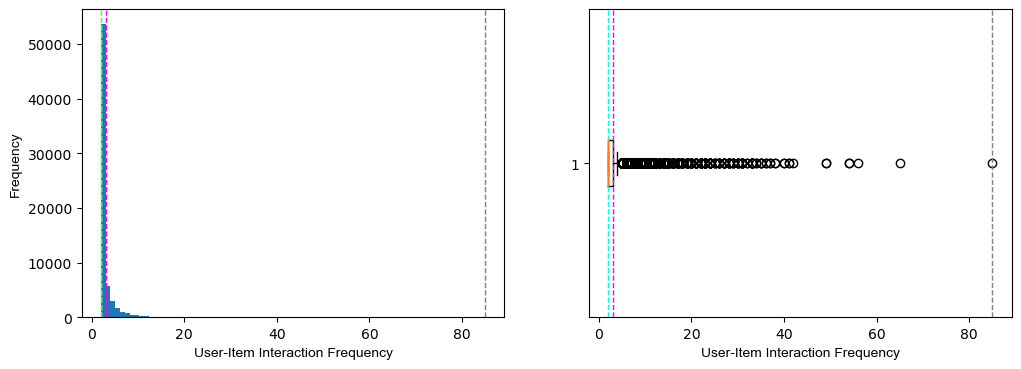

In [319]:
# Visualization of Order Volumes 
# Histogram & Boxplot

# Define feature column
feature = df_rebought[df_rebought['NumberOrders']>1]
feature = feature['NumberOrders']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (12,4))


# Plot the histogram   
ax[0].hist(feature, bins=80)
ax[0].set_ylabel('Frequency', fontname='Arial')
ax[0].set_xlabel('User-Item Interaction Frequency', fontname='Arial')
ax[0].ticklabel_format(useOffset=False, style='plain')

# Add lines for the mean, median, mode, min and max
ax[0].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[0].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Plot the boxplot   
ax[1].boxplot(feature, vert=False)
ax[1].set_xlabel('User-Item Interaction Frequency', fontname='Arial')
ax[1].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[1].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Add a title to the Figure
#fig.suptitle('Distribution of Order Volumes',fontname='Arial')

# Show the figure
fig.show()

In [445]:
len(df_rebought[df_rebought['NumberOrders']>1])

67723

In [316]:
len(df_rebought)

260152

In [317]:
df_rebought.NumberOrders.sum() - 137651

260152

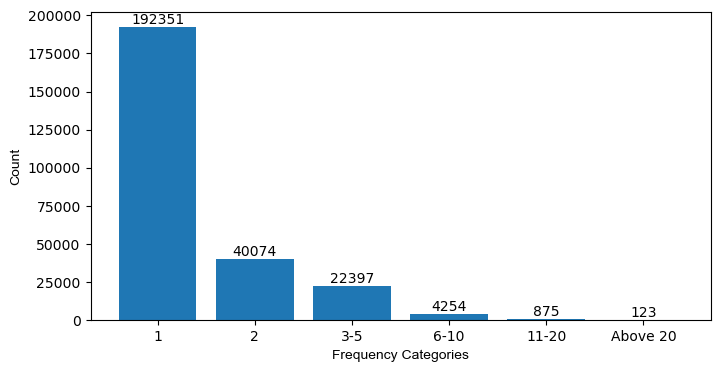

In [446]:
# Define Figure Size
plt.rcParams["figure.figsize"] = (8,4)

# Define the category ranges
bins = [0, 1,2, 5, 10, 20, np.inf]

# Assign labels for each category
labels = ['1', '2','3-5', '6-10', '11-20', 'Above 20']

# Use the pandas 'cut' function to assign categories to each value in the 'numerical_feature' column
df_rebought['category'] = pd.cut(df_rebought['NumberOrders'], bins=bins, labels=labels)

# Count the number of occurrences in each category
counts = df_rebought['category'].value_counts().sort_index()

# Prepare the data for the bar plot
categories = np.arange(len(labels))

# Create the bar plot
bars = plt.bar(categories, counts)

# Set the y-axis labels
plt.xticks(categories, labels=labels)

# Add counts on top of each bar
for i, bar in enumerate(bars):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        counts[i],
        ha='center',
        va='bottom',
    )
    
#plt.title('How many times did users buy the same item?',fontname='Arial')
plt.xlabel('Frequency Categories',fontname='Arial')
plt.ylabel('Count',fontname='Arial')

# Display the plot
plt.show()

### Cancelled Orders

In [503]:
# Rows that start with a C in InvoiceNo -- All Cancellations but 
df_cancellations = df_online_retail[df_online_retail.InvoiceNo.str[0]=='C']
df_cancellations.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
268334,C560409,769,LARGE RED RETROSPOT WINDMILL,-6,2011-07-18 14:24:00,2.10,3226,United Kingdom
52774,C540820,1513,LUNCH BOX I LOVE LONDON,-6,2011-01-11 13:09:00,1.95,2345,United Kingdom
156825,C550176,1990,KNICKERBOCKERGLORY MAGNET ASSORTED,-6,2011-04-14 17:13:00,0.83,1680,United Kingdom
383042,C569989,1520,RECIPE BOX PANTRY YELLOW DESIGN,-23,2011-10-06 20:08:00,2.55,3325,United Kingdom
349847,C567534,170,LUNCH BAG RED RETROSPOT,-2,2011-09-21 09:49:00,1.65,2950,United Kingdom
98141,C544669,1121,JIGSAW TREE WITH BIRDHOUSE,-1,2011-02-22 15:22:00,1.45,4197,United Kingdom
84713,C543431,1105,FOUR HOOK WHITE LOVEBIRDS,-1,2011-02-08 11:37:00,2.10,103,Germany
90368,C544034,764,STAR PORTABLE TABLE LIGHT,-5,2011-02-15 11:28:00,2.95,1744,United Kingdom
88092,C543764,2750,RETRO PLASTIC ELEPHANT TRAY,-12,2011-02-11 15:16:00,0.85,3462,United Kingdom
319987,C564955,829,RED RETROSPOT MUG,-6,2011-08-31 13:39:00,2.95,2548,United Kingdom


In [509]:
# Random Check
df_online_retail[df_online_retail['CustomerID']=='3226']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19510,537867,1621,FAMILY PHOTO FRAME CORNICE,2,2010-12-08 16:48:00,9.95,3226,United Kingdom
19511,537867,1634,GUMBALL MAGAZINE RACK,2,2010-12-08 16:48:00,7.65,3226,United Kingdom
19512,537867,1638,SQUARECUSHION COVER PINK UNION FLAG,2,2010-12-08 16:48:00,6.75,3226,United Kingdom
19513,537867,1686,HOT WATER BOTTLE BABUSHKA,8,2010-12-08 16:48:00,4.65,3226,United Kingdom
19514,537867,1014,SCOTTIE DOG HOT WATER BOTTLE,6,2010-12-08 16:48:00,4.95,3226,United Kingdom
...,...,...,...,...,...,...,...,...
472518,576688,2347,I LOVE LONDON WALL ART,6,2011-11-16 12:16:00,4.95,3226,United Kingdom
472519,576688,1305,12 COLOURED PARTY BALLOONS,20,2011-11-16 12:16:00,0.65,3226,United Kingdom
516381,C579887,3107,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,3226,United Kingdom
516382,C579887,3198,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,3226,United Kingdom


In [500]:
# How many of the Quantities are below one
quantity_values = matrix.values
below1 = np.sum(quantity_values < 1 )
print(below1)

2734


In [501]:
quantity_values.shape

(3699, 2743)

### Country of Origin

In [534]:
df_online_retail['Country'].value_counts(normalize=False)

United Kingdom          353358
Germany                   9384
France                    8418
EIRE                      7324
Spain                     2471
Netherlands               2353
Belgium                   2019
Switzerland               1860
Portugal                  1472
Australia                 1239
Norway                    1081
Italy                      798
Channel Islands            744
Finland                    678
Cyprus                     614
Sweden                     460
Austria                    395
Denmark                    383
Japan                      339
Poland                     338
USA                        288
Israel                     247
Unspecified                240
Singapore                  228
Iceland                    181
Greece                     144
Canada                     140
Malta                      121
United Arab Emirates        66
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [540]:
# Create DataFrame
df_user_country = df_online_retail.groupby('Country')['CustomerID'].nunique()

# Rename the columns
#df_user_country.columns = ['UniqueCustomers']

# Reset the index
#df_user_country.reset_index(inplace=True)

# Head
df_user_country

Country
Australia                  8
Austria                   10
Bahrain                    1
Belgium                   23
Brazil                     1
Canada                     2
Channel Islands            7
Cyprus                     8
Czech Republic             1
Denmark                    8
EIRE                       3
European Community         1
Finland                   11
France                    81
Germany                   89
Greece                     4
Iceland                    1
Israel                     3
Italy                     14
Japan                      5
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                7
Norway                    10
Poland                     5
Portugal                  19
RSA                        1
Singapore                  1
Spain                     26
Sweden                     8
Switzerland               20
USA                        4
United Arab Emirates       2
United

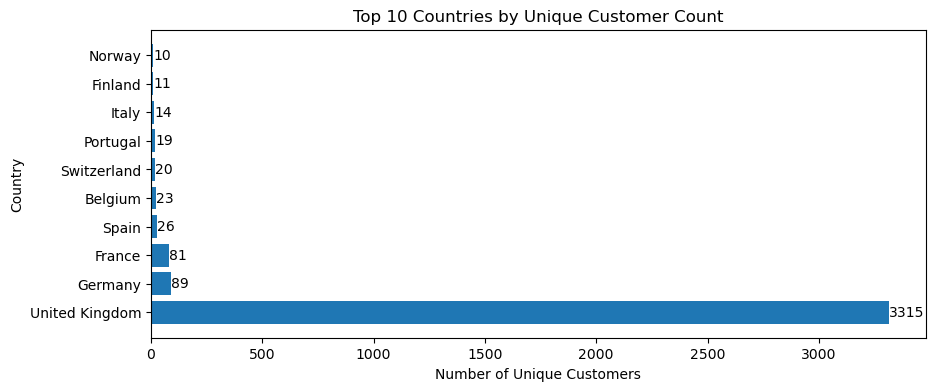

In [543]:
# Define Figure Size
plt.rcParams["figure.figsize"] = (10,4)

# Sort values in descending order 
df_user_country = df_user_country.sort_values(ascending=False)

# Allocate top ten into new dataframe 
top_10_countries = df_user_country.head(10)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_10_countries.index, top_10_countries.values)

# Display the unique customer count at the end of each bar
for i, (country, count) in enumerate(top_10_countries.items()):
    ax.text(count, i, f'{count}', ha='left', va='center')

# Set labels and title
ax.set_xlabel('Number of Unique Customers')
ax.set_ylabel('Country')
ax.set_title('Top 10 Countries by Unique Customer Count')

# Show the plot
plt.show()

# Sonstige

In [151]:
# Time Range of Transactions
print('First Transaction Date:\t', df_online_retail.InvoiceDate.min())
print('Last Transaction Date:\t', df_online_retail.InvoiceDate.max())

First Transaction Date:	 2010-12-01 08:26:00
Last Transaction Date:	 2011-12-09 12:50:00


In [545]:
# Popular Products 
print(df_online_retail.groupby(by='Description').size().sort_values(ascending=False).head(10))

Description
WHITE HANGING HEART T-LIGHT HOLDER    2025
REGENCY CAKESTAND 3 TIER              1852
JUMBO BAG RED RETROSPOT               1633
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1380
LUNCH BAG RED RETROSPOT               1353
SET OF 3 CAKE TINS PANTRY DESIGN      1221
POSTAGE                               1158
LUNCH BAG  BLACK SKULL.               1117
PACK OF 72 RETROSPOT CAKE CASES       1069
dtype: int64
